In [ ]:
# Import Packages

from tensorflow import keras
import numpy as np
import pandas as pd
from numpy import asarray
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Data
# data  = np.loadtxt('atomicmass3.txt')
#neutron_number = np.loadtxt('atomicmass3.txt', usecols = 0)
#proton_number  = np.loadtxt('atomicmass3.txt', usecols = 1)
#neutron_and_proton_number = np.loadtxt('atomicmass3.txt', usecols = (0,1))

#mass_excess    = np.loadtxt('atomicmass3.txt', usecols = 2)
#mass           = np.loadtxt('atomicmass3.txt', usecols = 5)

#data = pd.read_csv('drive/MyDrive/atomicmass3.txt', sep=" ", header=None)

data = pd.read_csv('drive/MyDrive/atomicmass3.txt', delim_whitespace=True, header=None, on_bad_lines='skip')

neutron_number = data[0]
proton_number  = data[1]
neutron_and_proton_number = data[[0,1]]
mass_excess    = data[2]
mass           = data[5]

<ipython-input-4-e3dfc936c0bf>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('drive/MyDrive/atomicmass3.txt', delim_whitespace=True, header=None, on_bad_lines='skip')


In [ ]:
neutron_number = np.array(neutron_number)
proton_number  = np.array(proton_number)
neutron_and_proton_number = np.array(neutron_and_proton_number)
mass_excess    = np.array(mass_excess)
mass           = np.array(mass)

Text(0, 0.5, 'Proton Number (Z)')

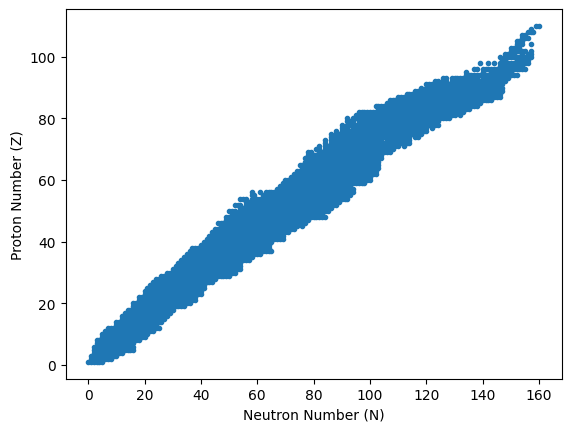

In [ ]:
# Test Plot
plt.plot(neutron_number,proton_number,'.')
plt.xlabel('Neutron Number (N)')
plt.ylabel('Proton Number (Z)')

Text(0, 0.5, 'Proton Number (Z)')

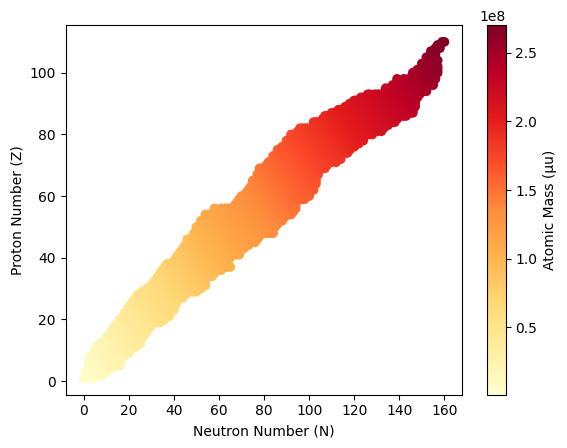

In [ ]:
# Test Plot with Mass Value
plt.scatter(neutron_number,proton_number,c = mass, cmap = 'YlOrRd')
plt.colorbar(label = 'Atomic Mass (μu)')
plt.xlabel('Neutron Number (N)')
plt.ylabel('Proton Number (Z)')

In [ ]:
# Model

def get_model(n_inputs, n_outputs):
        model = Sequential()

        model.add(Dense(500, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
        #model.add(Dropout(0.2))
        model.add(Dense(400, kernel_initializer='he_uniform', activation='relu'))
        model.add(Dense(400, kernel_initializer='he_uniform', activation='relu'))
        model.add(Dense(500, kernel_initializer='he_uniform', activation='relu'))

        model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
        #opt = keras.optimizers.Adam(learning_rate=lr_schedule)
        opt = keras.optimizers.Adam(learning_rate=0.0005)
        model.compile(loss='mse', optimizer=opt)
        return model

In [ ]:
# Jumlah Input dan Output
n_inputs, n_outputs = neutron_and_proton_number.shape[1], 1

model = get_model(n_inputs, n_outputs)

print(n_inputs)

2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(neutron_and_proton_number, mass, validation_split =0.15, verbose=0, epochs=800)

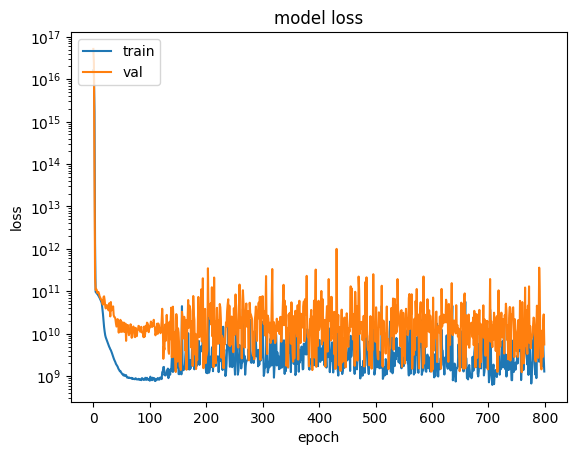

In [ ]:
#Plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Prediksi
mass_pred = np.array([])
for i in range(neutron_and_proton_number.shape[0]):
 input_X = neutron_and_proton_number[i]
 row = [input_X]
 new_row = input_X.reshape(1,-1)
 #new_row = asarray([row])
 fit = model.predict(new_row)
 mass_pred = np.append(mass_pred, fit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

Text(0, 0.5, 'Proton Number ($Z$)')

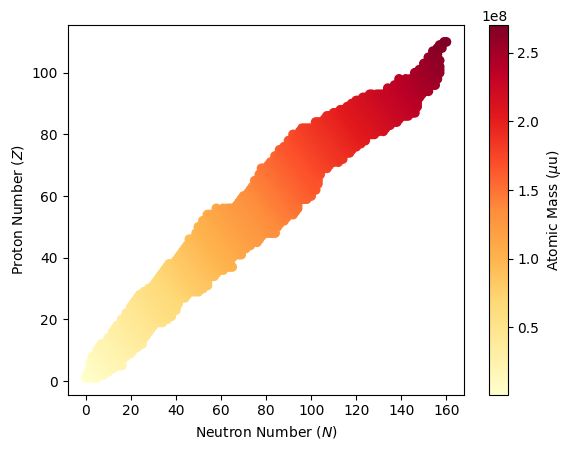

In [11]:
# Test Plot with Predicted Mass Value
plt.scatter(neutron_number,proton_number,c = mass_pred, cmap = 'YlOrRd')
plt.colorbar(label = 'Atomic Mass ($\mu$u)')
plt.xlabel('Neutron Number ($N$)')
plt.ylabel('Proton Number ($Z$)')

In [12]:
error = np.zeros_like(mass, dtype=float)

for i in range(len(mass)):
  error[i] = np.abs((mass_pred[i]-mass[i])/mass[i])*100

average_error = np.average(error)

print(average_error)

0.03503673536469744


In [13]:
for i in range(len(mass)):
  print(mass[i]*9.3/10000,mass_pred[i]*9.3/10000)

937.2772796651401 935.2218337500001
1873.11465339492 1902.7779075000003
2804.9258316276005 2826.0130875000004
2804.9072694321003 2821.7987925
3744.5816363100007 3754.1340225000004
3722.4210263409004 3753.445125
3745.2825717300007 3739.4916375
4682.83968756 4689.431070000001
4661.213218320001 4655.062455
4661.660154 4671.32862
5621.80855641 5626.549290000001
5597.563876770001 5597.403090000001
5594.0642853006 5602.8054600000005
5598.34556037 5599.85457
6536.031306360001 6541.255905000001
6524.8831938618005 6498.63633
6525.74370402 6523.398975000001
6537.63216 6537.9990450000005
7471.558980840001 7477.541775
7460.912206920001 7414.758870000001
7444.933744860001 7451.104665000001
7462.88480295 7458.264270000001
7475.00802627 7474.952655000001
8410.87016502 8414.75532
8394.914877629999 8383.125090000001
8381.330247660002 8349.88038
8382.396569850001 8373.79347
8398.86459786 8397.200640000001
9349.11823458 9343.4403
9332.99961129 9324.80961
9312.58726356 9253.49814
9312.031281660002 9299.49

In [14]:
mass_MeV      = mass*9.3/10000
mass_pred_MeV = mass_pred*9.3/10000

In [15]:
error_MeV = np.zeros_like(mass_MeV, dtype=float)

for i in range(len(mass_MeV)):
  sum_error = 0
  error_MeV[i] = (mass_MeV[i]-mass_pred_MeV[i])**2

  sum_error += error_MeV[i]

sigma_RMS = np.sqrt(sum_error/len(mass_MeV))

print(sigma_RMS)

2.7393763153987782
